**AWGN** stimulation

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.fftpack import fft, fftshift, ifft
from scipy import signal
from scipy.ndimage import shift

In [ ]:
%reset

In [6]:
# 双边
sigma = 1
width = 500
# 采样频率
fs = 1000
# 截取时间
t0 = 10
N = fs * t0

# 信号生成
signal = np.random.randn(1000, N) * math.sqrt(sigma)
t = np.linspace(0, 10, N)
f = np.linspace(-math.pi, math.pi, 2*N-1)

**PDF CDF**

In [7]:
# PDF
x = np.linspace(-sigma*4, sigma*4, 500)
kernel = stat.gaussian_kde(signal[0:300].flat)
a = kernel(x)

Text(0.5, 1.0, 'PDF')

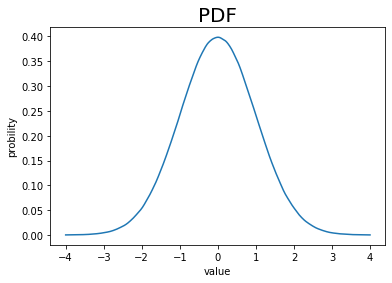

In [8]:
plt.plot(x, a)
plt.xlabel('value')
plt.ylabel('probility')
plt.title('PDF', fontsize = 20)

In [9]:
r = []
for i in range(signal.shape[0]):
    r.append(np.correlate(signal[i], signal[i], mode='full'))

In [10]:
r = np.array(r)/N

自相关函数

Text(0.5, 0, 'N')

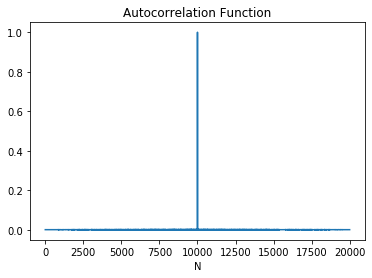

In [11]:
plt.plot(r.mean(0))
plt.title('Autocorrelation Function')
plt.xlabel('N')

In [12]:
p = []
for i in range(r.shape[0]):
    p.append(fftshift(abs(fft(r[i]))/fs))

In [13]:
p = np.array(p)

In [14]:
p.mean(0)

array([0.00100684, 0.00102767, 0.00100907, ..., 0.00100907, 0.00102767,
       0.00100684])

(-0.001, 0.005)

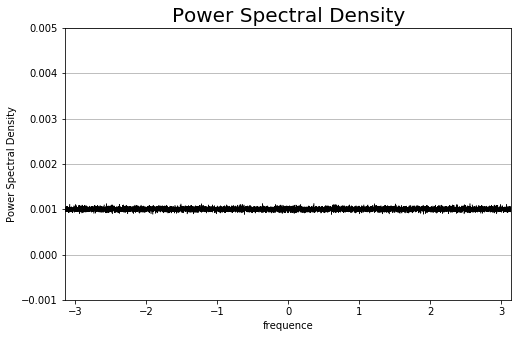

In [15]:
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
ax1.plot(f, p.mean(0), color='black', linewidth=0.5, linestyle='solid', label='close value')
ax1.grid(axis='y')
ax1.set_xlabel('frequence')
ax1.set_ylabel('Power Spectral Density')
plt.title('Power Spectral Density', fontsize = 20)
plt.xlim(-math.pi, math.pi)
plt.ylim(-0.001, 0.005)
# plt.legend(fontsize = 20)
# plt.savefig('macd.svg')

**正弦叠加**

In [16]:
x = []
for i in t:
    x.append(7*math.sin(5*i))

In [17]:
x = np.array(x)

(0.1, 9.9)

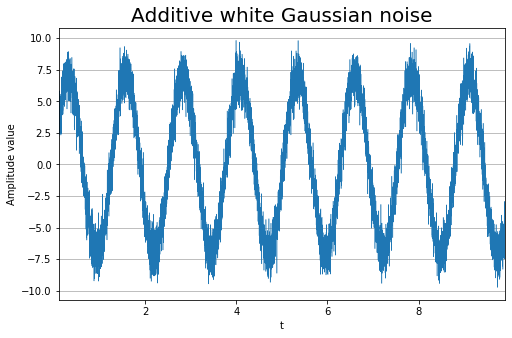

In [18]:
# plt.plot(t, x+signal[0])
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
ax1.plot(t, x+signal[0], linewidth=0.5, linestyle='solid', label='close value')
ax1.grid(axis='y')
ax1.set_xlabel('t')
ax1.set_ylabel('Amplitude value')
plt.title('Additive white Gaussian noise', fontsize = 20)
plt.xlim(0.1, 9.9)
# plt.ylim(-0.001, 0.005)
# plt.legend(fontsize = 20)
# plt.savefig('macd.svg')

**瑞利衰落信道搭建过程**

In [26]:
# 参数设置,载波频率
# fc = 2*10**9
# 采样频率
fsamp = 10**4
# 最高多普勒频移
v = 25/3
c = 3 * 10**8
fm = 100
# 延时
delay = 10**-4
E = 1
T = 1
# 采样点数量
point = int(fsamp * T)

瑞利

$
h_{\mathrm{I}}(t)=2 \sum_{n=1}^{N_{0}}\left(\cos \phi_{n} \cos w_{n} t\right)+\sqrt{2} \cos \phi_{N} \cos w_{\mathrm{d}} t
$
$h_{\mathrm{Q}}(t)=2 \sum_{n=1}^{N_{0}}\left(\sin \phi_{n} \cos w_{n} t\right)+\sqrt{2} \sin \phi_{N} \cos w_{\mathrm{d}} t$


In [27]:
# 到达波数量
N0 = 100
# 100组随机相位
phase = (np.random.randn(1, N0) * 2 * math.pi)[0]

#N为夹角，必定为正，入射波和平面夹角必定为正
N = (N0*2+1)*2

$\phi_{N}=0$

$\phi_{n}=\pi n /\left(N_{0}+1\right), \quad n=1,2, \cdots, N_{0}$

相移

In [28]:
t = np.arange(0,T,1/fsamp)
beta_n = np.linspace(1, N0, N0) * math.pi/(N0+1)
beta_N = 0

$w_{n}=w_{\mathrm{d}} \cos \theta_{n}=2 \pi f_{\mathrm{m}} \cos (2 \pi n / N), \quad n=1,2, \cdots, N_{0}$

频移

In [29]:
wn = 2 * math.pi * fm * np.cos(2*math.pi*np.linspace(1, N0, N0)/N)
wd = 2 * math.pi * fm

In [30]:
Ts = np.zeros(t.shape[0])
Tc = np.zeros(t.shape[0])
for i in range(N0):
    Tc = Tc+math.cos(beta_n[i])*np.cos(wn[i]*t+phase[i])
    Ts = Ts+math.sin(beta_n[i])*np.cos(wn[i]*t+phase[i])
Tc = Tc*2 + math.sqrt(2)*np.cos(wd*t)
Ts = Ts*2 
ht = E*(Tc+Ts*1j)/math.sqrt(2*N0+1)

In [31]:
x = np.linspace(-1, 5, 500)
kernel = stat.gaussian_kde(abs(ht))
a = kernel(x)

In [32]:
dream = np.random.rayleigh(scale=1,size=10000)
kernel = stat.gaussian_kde(abs(dream))
dream_distribution = kernel(x)

(500,)

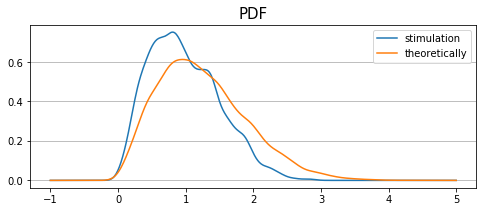

In [40]:
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(111)
ax1.plot(x, a, label='stimulation')
ax1.plot(x, dream_distribution, label='theoretically')
plt.grid(axis = 'y')
plt.legend()
plt.title('PDF',fontsize = 15)
fig.savefig('pdf.svg',bbox_inches="tight")

In [38]:
correlation = np.correlate(ht, ht, mode='full')/ht.shape[0]

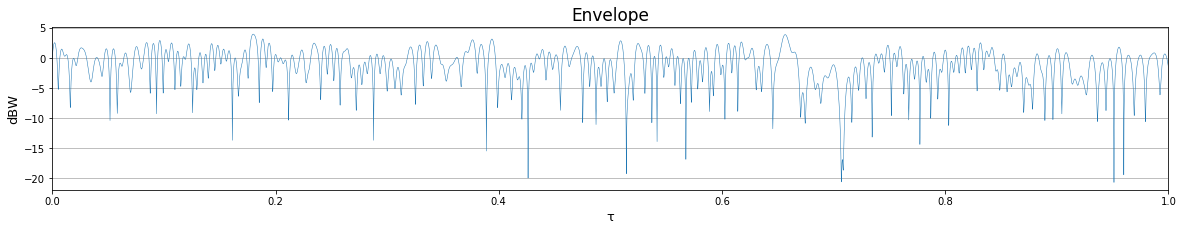

In [56]:
fig = plt.figure(figsize=(20, 3))
ax1 = fig.add_subplot(111)
ax1.plot(t, 10*np.log10(abs(jack_hz(fsamp, fm, T, E, 180).ht)), linewidth=0.5,
          linestyle='solid')
ax1.grid(axis='y')
ax1.set_xlabel(chr(964), fontsize=13)
ax1.set_ylabel('dBW', fontsize=13)
plt.title('Envelope', fontsize = 17)
plt.xlim(0, 1)
# plt.ylim(-0.001, 0.005)
# plt.legend(fontsize = 20)
fig.savefig('Envelope.svg',bbox_inches="tight")

In [57]:
# 简单将上述代码封装成了一个类
# fsamp 采样频率，fm 最大多普勒平移, T 总时长， E deta^2, N0 波到达个数 
class jack_hz:
    def __init__(self, fsamp, fm, T, E, N0, x=np.linspace(-1, 5, 500)):
        self.fsamp = fsamp
        self.fm = fm
        self.T = T
        self.E = E
        self.N0 = N0
        self.x = x
        self.ht = self.get_ht()
        self.Tc = 9/16/np.pi/fm
        self.pdf = self.get_pdf()

    # 得到包络ht
    def get_ht(self):
        # 随机相位
        phase = (np.random.randn(1, self.N0) * 2 * math.pi)[0]

        #N为夹角，必定为正，入射波和平面夹角必定为正
        N = (self.N0*2+1)*2
        t = np.arange(0, self.T, 1/self.fsamp)
        beta_n = np.linspace(1, self.N0, self.N0) * math.pi/(self.N0+1)

        wn = 2 * math.pi * self.fm * np.cos(2*math.pi*np.linspace(1, self.N0, self.N0)/N)
        wd = 2 * math.pi * self.fm

        Ts = np.zeros(t.shape[0])
        Tc = np.zeros(t.shape[0])
        for i in range(self.N0):
            Tc = Tc+math.cos(beta_n[i])*np.cos(wn[i]*t+phase[i])
            Ts = Ts+math.sin(beta_n[i])*np.cos(wn[i]*t+phase[i])

        Tc = Tc*2 + math.sqrt(2)*np.cos(wd*t)
        Ts = Ts*2 
        ht = self.E*(Tc+Ts*1j)/math.sqrt(2*self.N0+1)

        return ht

    def get_pdf(self):
        kernel = stat.gaussian_kde(np.abs(self.ht))
        a = kernel(self.x)
        return a

In [34]:
# 例子
# 在最大多普勒平移为100即 v*fc/c=100 的情况下，fs(t)>600hz,才是慢衰落
1/jack_hz(fsamp, fm, T, E, 180).Tc

558.5053606381855

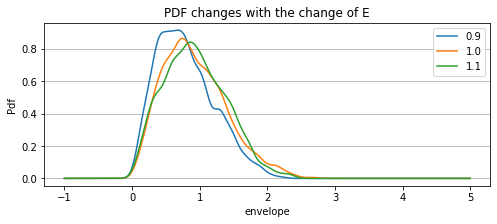

In [59]:
#不同E，不同包络
E = np.arange(0.9, 1.2, 0.1)

fig = plt.figure(figsize=(8, 3))

ax1 = fig.add_subplot(111)

for i in E:
    a = jack_hz(fsamp, fm, T, i, 200)
    ax1.plot(a.x, a.pdf, label = str(i) )
plt.legend()
ax1.grid(axis='y')
ax1.set_xlabel('envelope')
ax1.set_ylabel('Pdf')
plt.title('PDF changes with the change of E')
fig.savefig('E change.svg',bbox_inches="tight")

In [61]:
ht_E1 = jack_hz(fsamp, fm, T, i, 200).ht

In [62]:
corr_E1=np.correlate(ht_E1, ht_E1, mode='full')/ht_E1.shape[0]

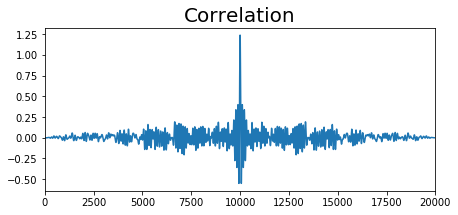

In [71]:
fig = plt.figure(figsize=(7, 3))
ax1 = fig.add_subplot(111)
ax1.plot(np.real(corr_E1))
plt.xlim(0,20000)
plt.title('Correlation', fontsize = 20)
fig.savefig('correlation.svg',bbox_inches="tight")

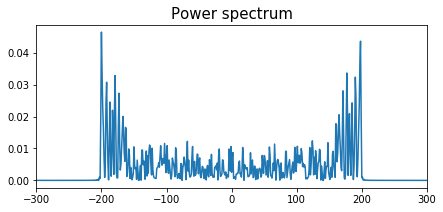

In [82]:
hz = np.arange(-np.floor(fsamp*T), np.floor(fsamp*T)-1, 1)
fig = plt.figure(figsize=(7, 3))
ax1 = fig.add_subplot(111)
ax1.plot(hz, abs(fftshift(fft(corr_E1)))/fsamp)
plt.xlim(-300, 300)
plt.title('Power spectrum', fontsize = 15)
fig.savefig('Power spectrum.svg',bbox_inches="tight")

快慢衰落

In [91]:
ht_E1 = jack_hz(fsamp=10**4, fm=20, T=1, E=1, N0=200)

In [92]:
# fs大于1/TC就是慢衰落
ht_E1.Tc

0.008952465548919113

In [93]:
1/ht_E1.Tc

111.70107212763709

快衰落

In [102]:
# sine
st_1 = np.sin(np.pi*2*5*t)

In [103]:
yt_1 = st_1*ht_E1.ht

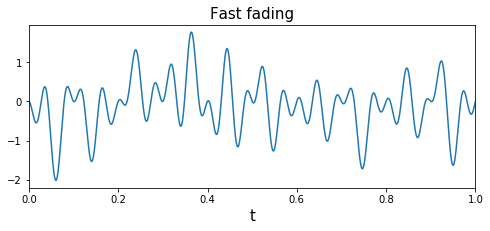

In [131]:
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(111)
ax1.plot(t, np.real(yt_1))
ax1.set_xlabel('t', fontsize = 15)
plt.xlim(0,1)
plt.title('Fast fading', fontsize=15)
fig.savefig('Fast fading.svg',bbox_inches="tight")

调高fs 慢衰落

In [124]:
st_2 = np.sin(np.pi*2*200*t)
yt_2 = st_2 * ht_E1.ht

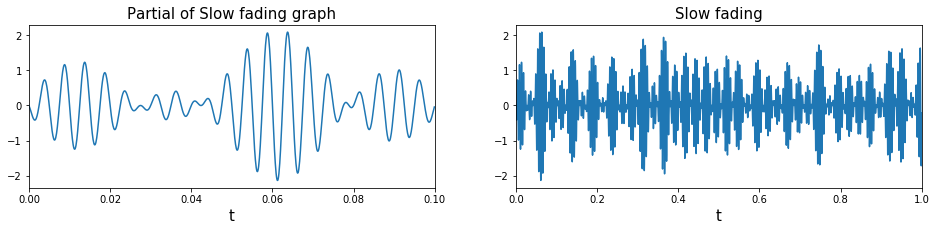

In [132]:
fig = plt.figure(figsize=(16, 3))
ax1 = fig.add_subplot(121)
ax1.plot(t[0:1000], np.real(yt_2)[0:1000])
ax1.set_xlabel('t', fontsize = 15)
ax1.set_xlim(0, 0.1)
ax2 = fig.add_subplot(122)
ax2.plot(t, np.real(yt_2))
ax2.set_xlabel('t', fontsize = 15)
ax2.set_xlim(0, 1)
ax1.set_title('Partial of Slow fading graph', fontsize=15)
ax2.set_title('Slow fading', fontsize=15)
fig.savefig('Slow fading.svg',bbox_inches="tight")